# Tutorial: Fourier series

This is an interactive tutorial written with real code.
We start by setting up $\LaTeX$ printing and importing some classes.

In [1]:
# Imports related to plotting and LaTeX
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display, Math
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
def show(arg):
    return display(Math(arg.to_latex()))

In [2]:
# Imports related to mathematics
import numpy as np
from abelian import LCA, HomLCA, LCAFunc
from sympy import Rational, pi

## Overview: $f(x) = x$ defined on $T = \mathbb{R}/\mathbb{Z}$

In this example we compute the Fourier series coefficients for
$f(x) = x$ with domain $T = \mathbb{R}/\mathbb{Z}$.

We will proceed as follows:

1. Define a function $f(x) = x$ on $T$.
2. Sample using pullback along $\phi_\text{sample}: \mathbb{Z}_n \to T$. Specifically, we will use $\phi(n) = 1/n$ to sample uniformly.
3. Compute the DFT of the sampled function using the `dft` method.
4. Use a transversal rule to move the DFT from $\mathbb{Z}_n$ to $\widehat{T} = \mathbb{Z}$.
5. Plot the result and compare with the analytical solution, which can be obtained by computing the complex Fourier coefficients of the Fourier integral by hand.

We start by defining the function on the domain.

## Defining the function

In [3]:
def identity(arg_list):
    return sum(arg_list)

# Create the domain T and a function on it
T = LCA(orders = [1], discrete = [False])
function = LCAFunc(identity, T)
show(function)

<IPython.core.display.Math object>

We now create a monomorphism $\phi_\text{sample}$ to sample the function, where we make use of the `Rational` class to avoid numerical errors.

## Sampling using pullback

In [4]:
# Set up the number of sample points
n = 8

# Create the source of the monomorphism
Z_n = LCA([n]) 
phi_sample = HomLCA([Rational(1, n)],T, Z_n)
show(phi_sample)

<IPython.core.display.Math object>

We sample the function using the pullback.

In [5]:
# Pullback along phi_sample
function_sampled = function.pullback(phi_sample)

Then we compute the DFT (discrete Fourier transform). The DFT is available on functions defined on $\mathbb{Z}_\mathbf{p}$ with $p_i \geq 1$, i.e. on FGAs with finite orders.

## The DFT

In [6]:
# Take the DFT (a multidimensional FFT is used)
function_sampled_dual = function_sampled.dft()

## Transversal

We use a transversal rule, along with $\widehat{\phi}_\text{sample}$, to push the function to $\widehat{T} = \mathbb{Z}$.

In [7]:
# Set up a transversal rule
def transversal_rule(arg_list):
    x = arg_list[0] # First element of vector/list
    if x < n/2:
        return [x]
    else:
        return [x - n]

# Calculate the Fourier series coefficients
phi_d = phi_sample.dual()
rule = transversal_rule
coeffs = function_sampled_dual.transversal(phi_d, rule)
show(coeffs)

<IPython.core.display.Math object>

## Comparing with analytical solution

Let us compare this result with the analytical solution, which is

$$c_k = 
  \begin{cases} 
   1/2 & \text{if } k = 0 \\
   -1 / 2 \pi i k   & \text{else}.
  \end{cases}$$

In [8]:
# Set up a function for the analytical solution
def analytical(k):
    if k == 0:
        return 1/2
    return complex(0, 1)/(2*pi*k)

# Sample the analytical and computed functions
sample_values = list(range(-int(1.5*n), int(1.5*n)+1))
analytical_sampled = list(map(analytical, sample_values))
computed_sampled = coeffs.sample(sample_values)

# Because the forward DFT does not scale, we scale manually
computed_sampled = [k/n for k in computed_sampled]

Finally, we create the plot comparing the computed coefficients with the ones obtained analytically. Notice how the computed values drop to zero outside of the transversal region.

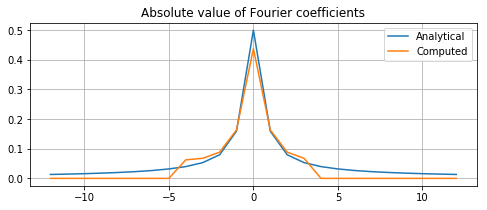

In [9]:
# Since we are working with complex numbers
# and we wish to plot them, we convert
# to absolute values first
length = lambda x: float(abs(x))
analytical_abs = list(map(length, analytical_sampled))
computed_abs = list(map(length, computed_sampled))

# Plot it
plt.figure(figsize = (8,3))
plt.title('Absolute value of Fourier coefficients')
plt.plot(sample_values, analytical_abs, label = 'Analytical')
plt.plot(sample_values, computed_abs, label = 'Computed')
plt.grid(True)
plt.legend(loc = 'best')
plt.show()